# **Data Analytics Final Project Report**




In [ ]:
from random import sample
import pandas as pd
import numpy as np

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn import linear_model
import statsmodels.api as sm

import seaborn as sns
import datetime
from datetime import datetime
from re import S

!pip install pmdarima
from pmdarima import auto_arima


### **Exploratory Data Analysis**

In [ ]:
file_path = 'subway_traffic_volume.csv'


df = pd.read_csv(file_path)
neighborhood_station_counts = df.groupby('Neighborhood')['Stop Name'].nunique()
neighborhood_station_counts = neighborhood_station_counts.sort_values(ascending=False)

print(neighborhood_station_counts)

Neighborhood
Lower East Side/Chinatown    10
Name: Stop Name, dtype: int64


### **Data Proprocessing**

### **Linear Regression**

In [ ]:
data = pd.read_csv("subway_neighbor_df.csv")
data = data.dropna()
for col in data.columns:
    print(col)
data.head()


Datetime
Stop Name
Line
Neighborhood
Entries
Time
Average_Flow
Normalized_Flow
Housing units
Percent white
Moderately rent-burdened households, moderate income
Pre-foreclosure notice rate (per 1,000 1-4 family and condo properties)
Median sales price per unit, condominium (2018$)
Home purchase loans to LMI borrowers (% of home purchase loans)
Refinance loan rate (per 1,000 properties)
Single-person households
Residential units within 12 mile of a subway station
Racial diversity index


,Datetime,Stop Name,Line,Neighborhood,Entries,Time,Average_Flow,Normalized_Flow,Housing units,Percent white,"Moderately rent-burdened households, moderate income","Pre-foreclosure notice rate (per 1,000 1-4 family and condo properties)","Median sales price per unit, condominium (2018$)",Home purchase loans to LMI borrowers (% of home purchase loans),"Refinance loan rate (per 1,000 properties)",Single-person households,Residential units within 12 mile of a subway station,Racial diversity index
0,2017-02-04 08:00:00,1 Av,Canarsie,Lower East Side/Chinatown,1205.0,08:00:00,1893.282754,0.636461,78557,31.0,38.1,11.4,1326500,31.8,7.2,46.4,85.5,0.71
1,2017-02-04 12:00:00,1 Av,Canarsie,Lower East Side/Chinatown,2920.0,12:00:00,2555.773227,1.142511,78557,31.0,38.1,11.4,1326500,31.8,7.2,46.4,85.5,0.71
2,2017-02-04 16:00:00,1 Av,Canarsie,Lower East Side/Chinatown,3880.0,16:00:00,3487.845732,1.112435,78557,31.0,38.1,11.4,1326500,31.8,7.2,46.4,85.5,0.71
3,2017-02-04 20:00:00,1 Av,Canarsie,Lower East Side/Chinatown,3820.0,20:00:00,3048.494204,1.253078,78557,31.0,38.1,11.4,1326500,31.8,7.2,46.4,85.5,0.71
4,2017-02-05 00:00:00,1 Av,Canarsie,Lower East Side/Chinatown,2474.0,00:00:00,1051.803429,2.352151,78557,31.0,38.1,11.4,1326500,31.8,7.2,46.4,85.5,0.71


We have selected Average Flow as our dependent variable (y) and the ten features we decided to keep collectively as our dependent variables (X). After adding a constant to X, we performed multiple linear regression into the data through ordinary least squares.

We were able to find each of the dependent variables' direct effects on average flow by looking at their coefficients, as well as their stastical significance. All of them have P scores of 0 which means they are very statistically significant, and that .   

Moreover, the R-square distribution is only 17.6% which is quite low. This should be unsurprising since the possibility of these features having a linear effect on subway flow is very small. This suggests room for improvement in the model.

In [ ]:
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%Y-%m-%d %H:%M:%S')
y = data.iloc[:,6] #Normalized_Flow
X = data.iloc[:,8:18] #Housing units - Racial diversity index
independent_variables = data.iloc[:,8:18]
print(independent_variables.shape[1])

10


The first model we used in our analysis was linear regression. We initially applied Multiple Linear Regression using simple Ordinary Least Squares on the data, with average flow as the dependent variable and ten selected features as the independent variables. Despite obtaining a low R-squared score of 17.6%, all feature variables had statistically significant p-values of zero. This is indicative of something important missing - that average flow changes every four hours but the features do not. In fact, there are only six values for the whole year for each station.

In [ ]:
y = data.iloc[:,6] #Normalized_Flow
X = data.iloc[:,8:18] #Housing units - Racial diversity index

# Add a constant term to the independent variable (X)
X_new = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_new).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Average_Flow   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                 9.775e+04
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               0.00
Time:                        06:25:27   Log-Likelihood:            -3.9624e+07
No. Observations:             4589380   AIC:                         7.925e+07
Df Residuals:                 4589369   BIC:                         7.925e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [ ]:
residuals = model.resid
model2 = sm.OLS(residuals, X_new).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                -4.027e-08
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               1.00
Time:                        06:25:34   Log-Likelihood:            -3.9624e+07
No. Observations:             4589380   AIC:                         7.925e+07
Df Residuals:                 4589369   BIC:                         7.925e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
sm_model = sm.OLS(y_train, X_train).fit()
print(sm_model.summary())

lr = LinearRegression()
lr.fit(X_train, y_train)
print("For a linear model, the R square value based on the training data is", lr.score(X_train, y_train))
print("For a linear model, the R square value based on the testing data is", lr.score(X_test,y_test))

                                 OLS Regression Results                                
Dep. Variable:           Average_Flow   R-squared (uncentered):                   0.504
Model:                            OLS   Adj. R-squared (uncentered):              0.504
Method:                 Least Squares   F-statistic:                          3.728e+05
Date:                Mon, 18 Dec 2023   Prob (F-statistic):                        0.00
Time:                        06:25:45   Log-Likelihood:                     -3.1699e+07
No. Observations:             3671504   AIC:                                  6.340e+07
Df Residuals:                 3671494   BIC:                                  6.340e+07
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                                                              coef    std err          t      P>|t|     

In [ ]:
c = lr.intercept_
m = lr.coef_
print(c)
print(m)

679.8815853673344
[ 1.44178172e-02 -7.83050067e+00  2.43420357e+01  8.39415136e-01
  6.60221156e-05 -3.80216465e-01 -5.13672890e+01  9.57682536e+00
 -5.92262932e+00 -3.13281647e+02]


In [ ]:
y_pred_train = lr.predict(X_train)

In [ ]:
r2_score(y_train, y_pred_train)

0.17538891769858855

In [ ]:
Lines = data['Line'].unique()

training_results = []

Xs = [] #Each X is a row of the matrix, next station next row
Ys = [] #There's only one Y in each station

i = 0
for line in Lines:
    Stops = data[data['Line'] == line]['Stop Name'].unique()  #Stops
    for stop in Stops:
        data_filtered = data[(data['Stop Name'] == stop) & (data['Line'] == line)]
        if not data_filtered.empty:
            X = data_filtered.iloc[:, 8:18].mean().tolist()  # Convert mean values to a list
            Xs.append(X)
            y = data_filtered.iloc[:,6].mean().tolist()
            Ys.append(y)

Xs_matrix = pd.DataFrame(Xs)
Ys_column = pd.DataFrame(Ys)


print(Xs_matrix)
print(Ys_column)

           0     1     2      3          4     5     6     7      8     9
0    78557.0  31.0  38.1   11.4  1326500.0  31.8   7.2  46.4   85.5  0.71
1    78557.0  31.0  38.1   11.4  1326500.0  31.8   7.2  46.4   85.5  0.71
2    87668.0  72.2  42.3    5.8  2413920.0   1.5   9.2  47.5  100.0  0.45
3    87668.0  72.2  42.3    5.8  2413920.0   1.5   9.2  47.5  100.0  0.45
4    65828.0   3.9  10.0  110.3   308780.0  58.5  18.0  32.0   71.2  0.57
..       ...   ...   ...    ...        ...   ...   ...   ...    ...   ...
435  68927.0  50.1   9.9   36.5   463680.0   8.4  14.1  20.1   39.7  0.59
436  68927.0  50.1   9.9   36.5   463680.0   8.4  14.1  20.1   39.7  0.59
437  68927.0  50.1   9.9   36.5   463680.0   8.4  14.1  20.1   39.7  0.59
438  68927.0  50.1   9.9   36.5   463680.0   8.4  14.1  20.1   39.7  0.59
439  51437.0  21.5  26.4   91.2   662740.0  97.4  15.0  26.0   97.9  0.63

[440 rows x 10 columns]
               0
0    2058.808809
1     734.541892
2     339.389812
3    2624.074470
4 

The model has improved as the r-squared score of test set is now 34.3%.

In [ ]:
Xs_matrix_new = np.c_[np.ones(Xs_matrix.shape[0]), Xs_matrix]

X = Xs_matrix_new
y = Ys_column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

#print(f"R2 Score for training data: {r2_score(y_train, y_pred)}")
print(f"R2 Score for testing data: {r2_score(y_test, y_pred)}")


R2 Score for testing data: 0.343303046838751


In [ ]:
print("For a linear model, the R square value based on the training data is", model.score(X_train, y_train))
print("For a linear model, the R square value based on the testing data is", model.score(X_test,y_test))

For a linear model, the R square value based on the training data is 0.33041715408846006
For a linear model, the R square value based on the testing data is 0.343303046838751


### **Time Series**

In [ ]:
datafile = 'subway_neighbor_df.csv'
df = pd.read_csv(datafile).dropna()
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [ ]:
print(df)

### **Look into the Average_Flow of Station 1 (1 Ave at Canarsie Line)**

<Figure size 1000x600 with 0 Axes>

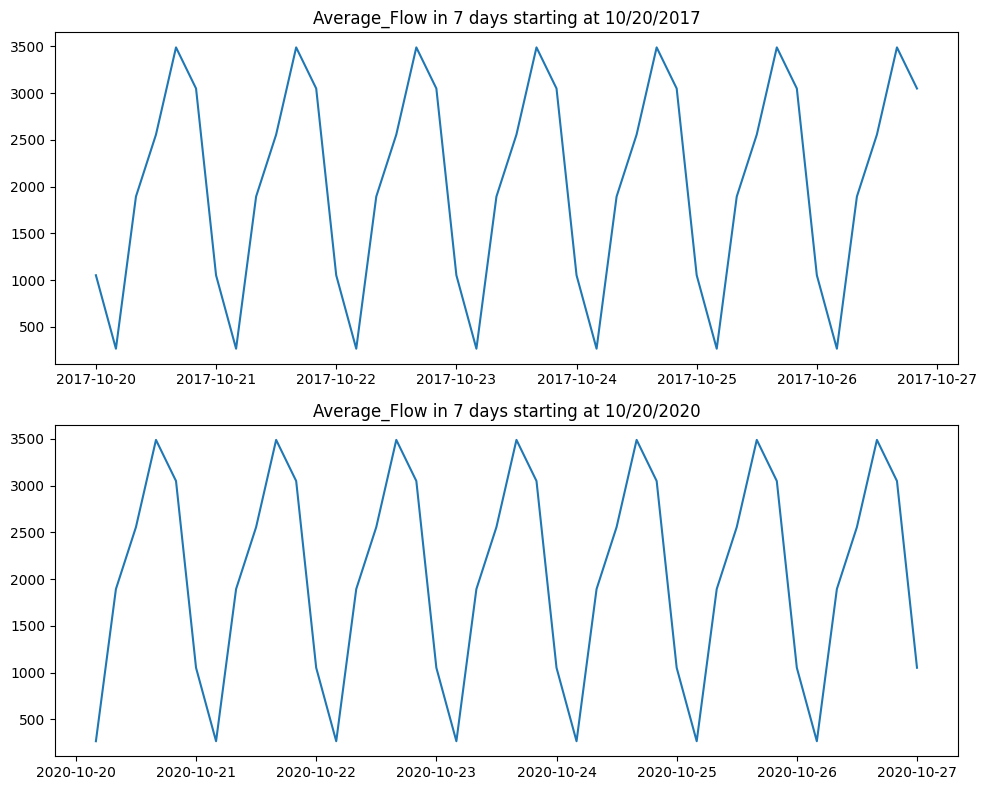

In [ ]:
df1 = df[(df['Stop Name'] == '1 Av') & (df['Line'] == 'Canarsie')] #One line, one stop
#print(df1['Average_Flow'])

df1_time_flow = df1[['Datetime', 'Average_Flow']].copy() #We keep only the Datetime and Normalized Flow columns
df1_time_flow.set_index('Datetime', inplace=True) # Using date as the index


k = len(df1['Average_Flow']) + 1

#import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Create a 1x2 grid of subplots to show the traffic pattern in 2017 and 2021
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

axes[0].plot(df1_time_flow.iloc[1542:1584], linestyle='-')
axes[1].plot(df1_time_flow.iloc[8000:8042], linestyle='-')

# Set titles for subplots
axes[0].set_title('Average_Flow in 7 days starting at 10/20/2017')
axes[1].set_title('Average_Flow in 7 days starting at 10/20/2020')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### Average flow is identical every day, between 2017 and 2021, as proven in the samples below

The final model we will present is the times series model, which is quite different from the rest. Each station's subway flow forms individual time series of their own in the entire dataset. So we found that instead of performing time series analysis on the entire dataset collectively, it's more practical to examine the invidual stations’ time series separately. Two specific stations, 1st Avenue Station (Canarsie Line) and Broad Street Station (Jamaica Line), were selected for analysis. Besides, the data was transformed from hourly to daily because it would be more useful.

Attempts to create a time series of Average Flow revealed consistent values daily from 2017 to 2021, making predictions meaningless. Therefore, we chose Normalized flow as a more suitable dependent variable for the time series model. The code and diagrams below displays the differences between average flow and normalized flow for 1st Avene station clearly.


We first attemped to perform time series data analysis on each station's Average_Flow but only found it to be meaningless as the Average_Flow only cycles through the same 6 values every day through out the whole period, for 6 specific hours (e.g, 0:00, 4:00, 8:00, 12:00, 16:00, 20:00).  Obviously this data has been processed based on some averaging method.  Instead, we found ridership data from another column, Normalize_Flow, make a lot of more sense.  For example, it clearly shows both the short-term (e.g., over different hours during a day and over different days over a week),  and lont-term varations (e.g., the drastic disruption caused by Covid-19 and and slow recovery after the peak of the pandemic).  Further investigations into the Normalized_Flow ridership data reveals two facts: (1) the ridership of the same station has significant differences over different period of time such as pre-Covid and post-Covid period; and (2) different stations also have quite different ridership data during the same period.  

As expected, each station's Normalized_Flow has shown two strong seasonalities: seasonality cross the 24-hour period and the seasonality cross the 7-day period.  In this analysis we decided to only study the daily ridership data instead of the original per reading in every 4 hours, because we believed predicting daily ridership is of more interest in pratical.  To do so, we summed the Normalized_Flow cross each day to obtain the daily data.  A simple analysis on the daily data shows strong seasonality cross 7 days, as expected.  Auto ARIMA model with seasonality is used to predict the daily ridership of the next 28 days after the model is trained with roughtly 365 days of data, which means roughly ~13-month of data (400 days of data) is used for the analysis. In addition, two different 13-month windows ( are chosen for each station, one before Covid and one after, to show the drastic change of the ridership caused by Covid.  The data from mulitple stations were analyzed and we will use two randomly selected stations (Stop 1 Ave at Canarise Line, and Stop Broad St. at Jamaica Line) to demonstrate our work.

## **Look into the Normalized_Flow of Station 1 (1 Ave at Canarsie Line)**

<Figure size 1000x600 with 0 Axes>

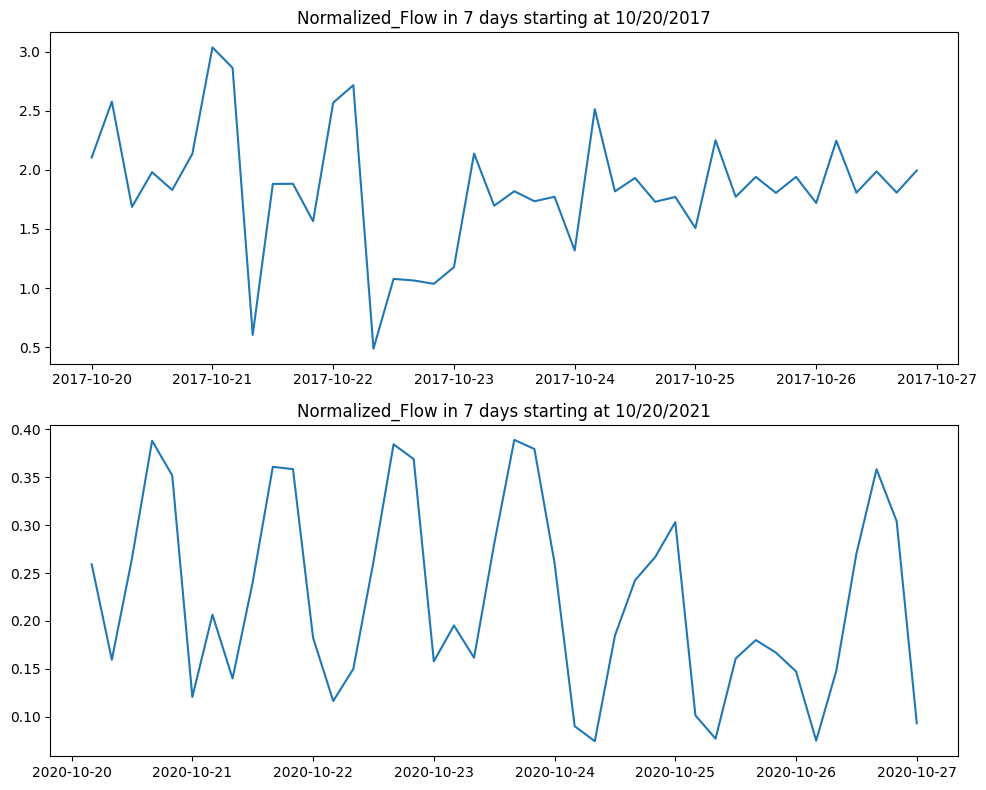

In [ ]:
df1 = df[(df['Stop Name'] == '1 Av') & (df['Line'] == 'Canarsie')] #One line, one stop

df1_time_flow = df1[['Datetime', 'Normalized_Flow']].copy() #Keeping only the Datetime and Normalized Flow columns
df1_time_flow.set_index('Datetime', inplace=True) # using date as the index
#df1_time_flow.head()

k = len(df1_time_flow) + 1

import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Create a 1x2 grid of subplots to show the traffic pattern in 2017 and 2021
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

axes[0].plot(df1_time_flow.iloc[1542:1584], linestyle='-')  # ridership in 2017
axes[1].plot(df1_time_flow.iloc[8000:8042], linestyle='-')  # ridership in 2021

# Set titles for subplots
axes[0].set_title('Normalized_Flow in 7 days starting at 10/20/2017')
axes[1].set_title('Normalized_Flow in 7 days starting at 10/20/2021')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


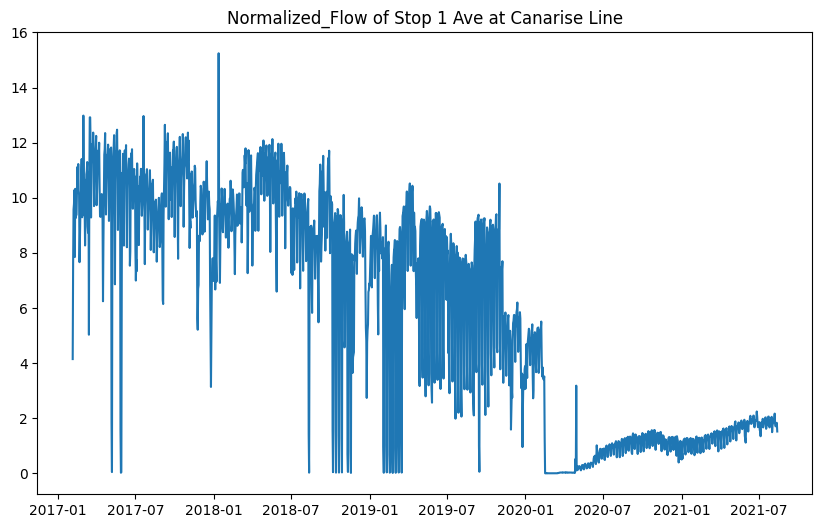

In [ ]:
# Aggregating data cross a day

d1_time_flow_daily = df1_time_flow['Normalized_Flow'].resample('D').sum()

# plot the daily data cross the 2017~2022 period

plt.figure(figsize=(10, 6))

plt.plot(d1_time_flow_daily, linestyle='-')
plt.title('Normalized_Flow of Stop 1 Ave at Canarise Line')
# Show the plot
plt.show()

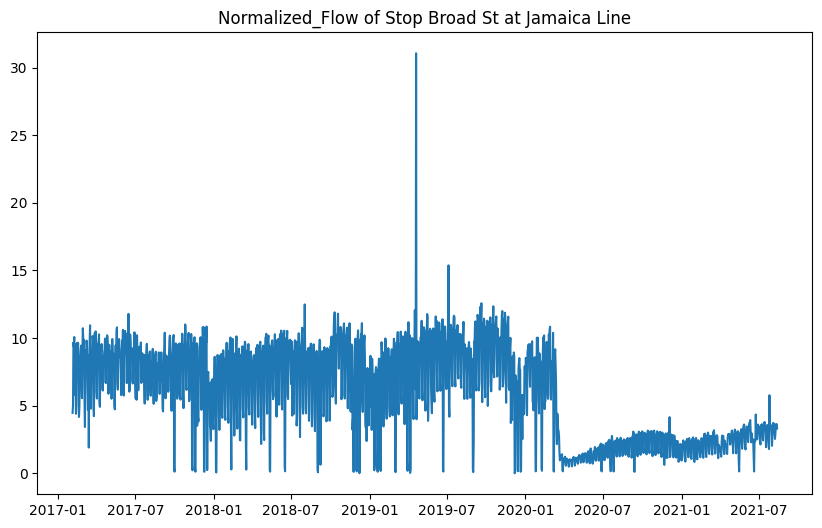

In [ ]:
# The above figure shows a clear disruption caused by Covid.
# we now look into another station, Station 2, Broad St at Jamaica Line


df[df['Line']=='Jamaica']['Stop Name'].unique()
df2 = df[(df['Stop Name'] == 'Broad St') & (df['Line'] == 'Jamaica')]

df2_time_flow = df2[['Datetime', 'Normalized_Flow']].copy()
df2_time_flow.set_index('Datetime', inplace=True)

# Aggregating data cross a day

d2_time_flow_daily = df2_time_flow['Normalized_Flow'].resample('D').sum()

# plot the daily data cross the whole window

plt.figure(figsize=(10, 6))

plt.plot(d2_time_flow_daily, linestyle='-')
plt.title('Normalized_Flow of Stop Broad St at Jamaica Line')
# Show the plot
plt.show()

# The figure below also shows the significant distribution caused by Covid

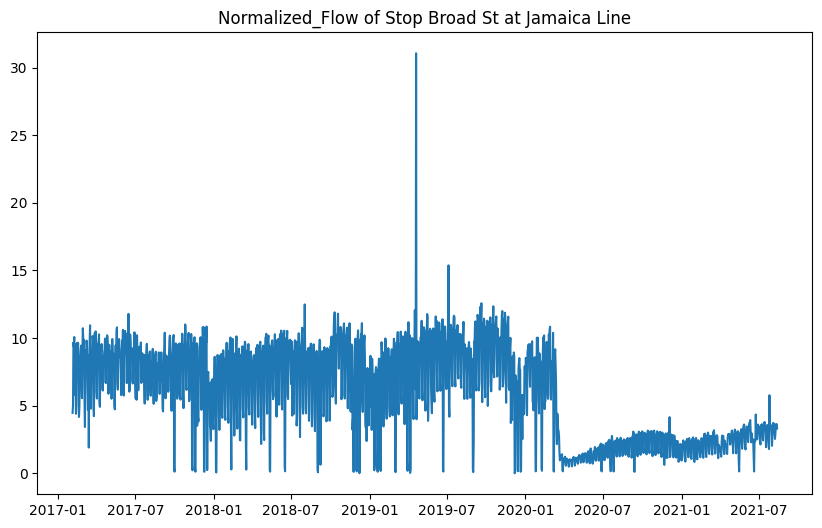

In [ ]:
# The above figure shows a clear disruption caused by Covid.
# we now look into another station, Station 2, Broad St at Jamaica Line


df[df['Line']=='Jamaica']['Stop Name'].unique()
df2 = df[(df['Stop Name'] == 'Broad St') & (df['Line'] == 'Jamaica')]

df2_time_flow = df2[['Datetime', 'Normalized_Flow']].copy()
df2_time_flow.set_index('Datetime', inplace=True)

# Aggregating data cross a day

d2_time_flow_daily = df2_time_flow['Normalized_Flow'].resample('D').sum()

# plot the daily data cross the whole window

plt.figure(figsize=(10, 6))

plt.plot(d2_time_flow_daily, linestyle='-')
plt.title('Normalized_Flow of Stop Broad St at Jamaica Line')
# Show the plot
plt.show()

# The figure below also shows the significant distribution caused by Covid

In [ ]:

# d1 pre-covid
d1_pre_ridership = d1_time_flow_daily.iloc[0:1060]

# d1 post-covid
d1_post_ridership = d1_time_flow_daily.iloc[1200:]

# d2 pre-covid
d2_pre_ridership = d2_time_flow_daily.iloc[0:1060]

# d1 post-covid
d2_post_ridership = d2_time_flow_daily.iloc[1200:]

In [ ]:
pip install pmdarima

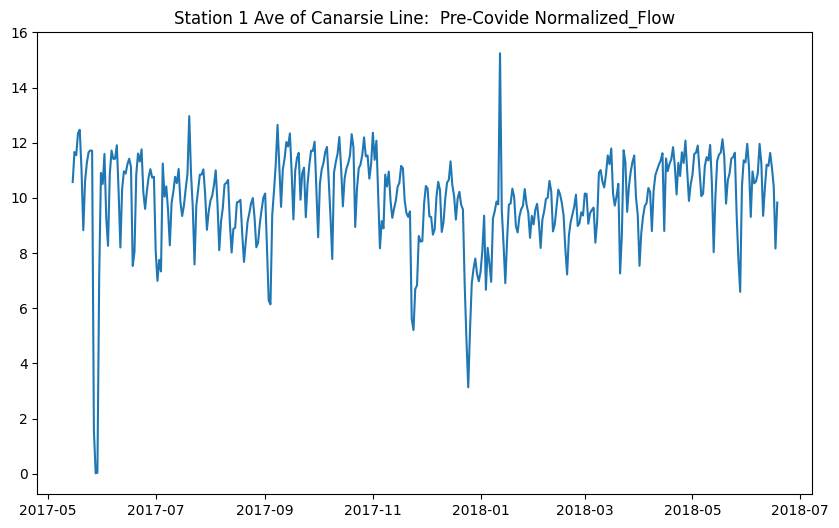

the lenth of the time-series data is 400


<Figure size 1600x1200 with 0 Axes>

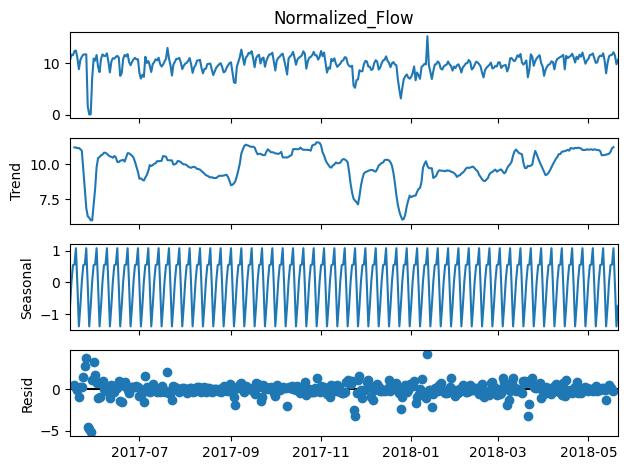

In [ ]:
### Time analysis of Pre-Covid data of Station 1 -- Part 1

# d1 pre-covid
d1_pre_ridership = d1_time_flow_daily.iloc[100:100+400]


plt.figure(figsize=(10, 6))

plt.plot(d1_pre_ridership, linestyle='-')
plt.title('Station 1 Ave of Canarsie Line:  Pre-Covid Normalized_Flow')
# Show the plot
plt.show()
d1_pre_ridership.head()



#pip install pmdarima

from pmdarima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting


y = d1_pre_ridership
print('the lenth of the time-series data is', len(y))


pd_steps = 28  # predicting 28 days ahead

y_train = y[:len(y) - pd_steps]
y_test = y[len(y) - pd_steps:]

# Decompose y_train to see the trend and seasonality
ts_decomp = sm.tsa.seasonal_decompose(y_train, model = 'additive')
plt.figure(figsize=(16, 12))
ts_decomp.plot()
plt.show()

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  372
Model:             SARIMAX(1, 1, 1)x(2, 0, 1, 7)   Log Likelihood                 280.264
Date:                           Mon, 18 Dec 2023   AIC                           -548.527
Time:                                   06:58:43   BIC                           -525.030
Sample:                               05-19-2020   HQIC                          -539.195
                                    - 05-25-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3695      0.060      6.184      0.000       0.252       0.487
ma.L1         -0.8945      0.038    -23.755

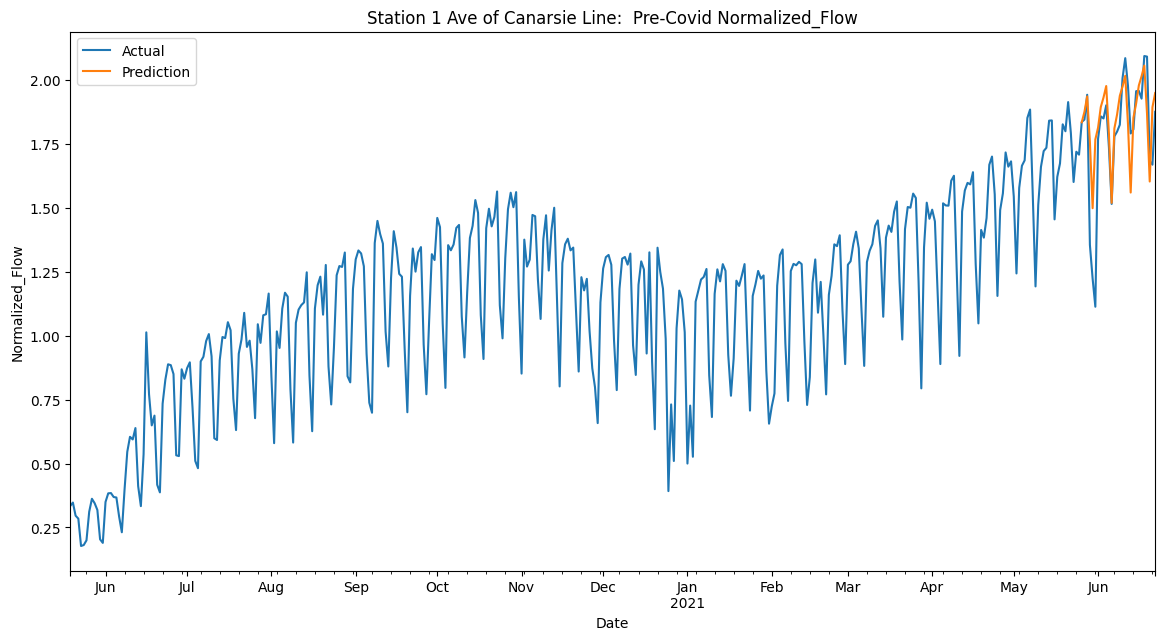

In [ ]:
### Time analysis of Pre-Covid data of Station 1  -- Part 2

# Use auto_arima to find the best ARIMA parameters with seasonalty set to 7 from the above decomposition

model = auto_arima(y_train, seasonal=True, m=7)

# Print the summary of the best model
print(model.summary())

# Forecast
forecast, conf_int = model.predict(n_periods=pd_steps, return_conf_int=True)
predictions = pd.Series(forecast, index=y_test.index)

fig, ax = plt.subplots(figsize=(14, 7))
y.plot(label='Actual', ax=ax)
predictions.plot(ax=ax, label='Prediction')
plt.xlabel('Date')
plt.ylabel('Normalized_Flow')
plt.legend()
plt.title('Station 1 Ave of Canarsie Line:  Pre-Covid Normalized_Flow')
plt.show()

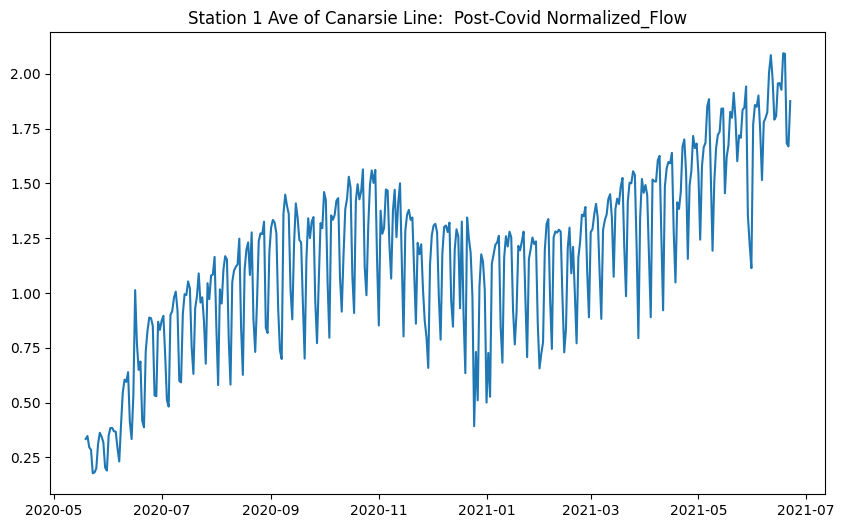

the lenth of the time-series data is 400


<Figure size 1600x1200 with 0 Axes>

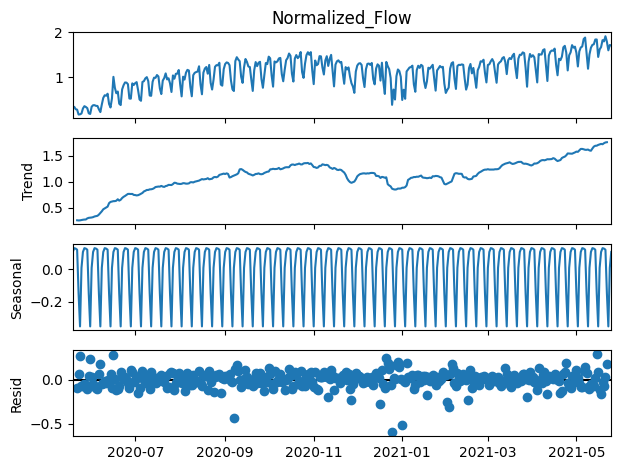

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  372
Model:             SARIMAX(1, 1, 1)x(2, 0, 1, 7)   Log Likelihood                 280.264
Date:                           Mon, 18 Dec 2023   AIC                           -548.527
Time:                                   06:56:20   BIC                           -525.030
Sample:                               05-19-2020   HQIC                          -539.195
                                    - 05-25-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3695      0.060      6.184      0.000       0.252       0.487
ma.L1         -0.8945      0.038    -23.755

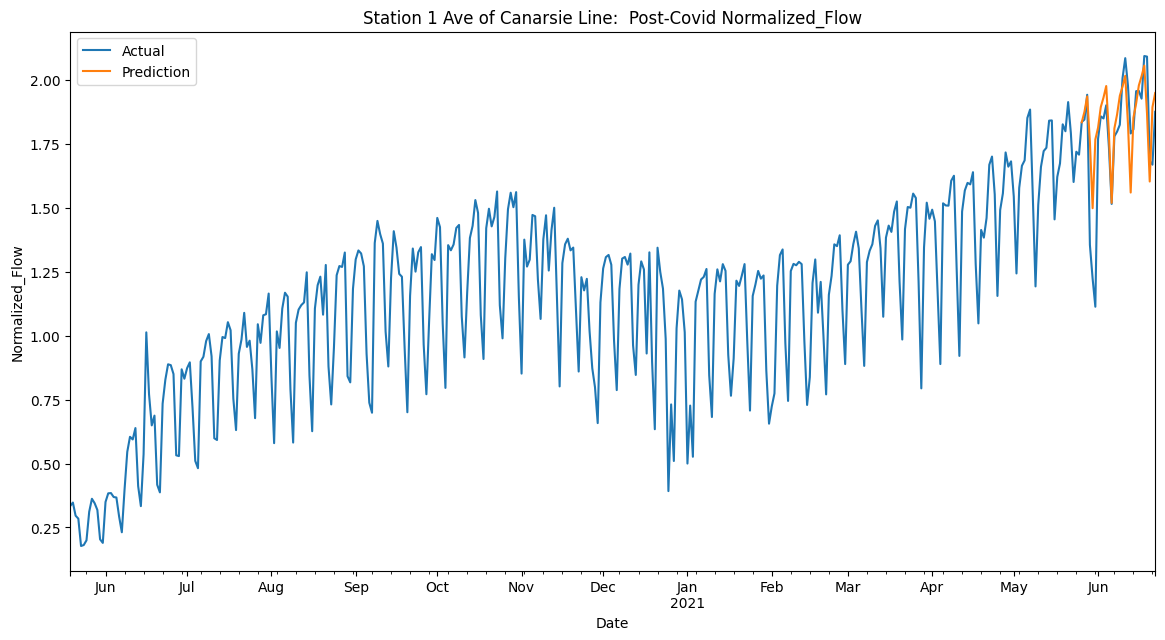

In [ ]:
# SARIMA for d1_post_ridership (post Covid)

# d1 post-covid
d1_post_ridership = d1_time_flow_daily.iloc[1200:1200+400]


plt.figure(figsize=(10, 6))

plt.plot(d1_post_ridership, linestyle='-')
plt.title('Station 1 Ave of Canarsie Line:  Post-Covid Normalized_Flow')
# Show the plot
plt.show()
d1_post_ridership.head()



#pip install pmdarima

from pmdarima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting


y = d1_post_ridership
print('the lenth of the time-series data is', len(y))


pd_steps = 28  # predicting 28 days ahead

y_train = y[:len(y) - pd_steps]
y_test = y[len(y) - pd_steps:]

# Decompose y_train
ts_decomp = sm.tsa.seasonal_decompose(y_train, model = 'additive')
plt.figure(figsize=(16, 12))
ts_decomp.plot()
plt.show()


# Use auto_arima to find the best ARIMA parameters with seasonalty set to 7 from the above decomposition

model = auto_arima(y_train, seasonal=True, m=7)  # Adjust 'm' based on your seasonality

# Print the summary of the best model
print(model.summary())

# Forecast
forecast, conf_int = model.predict(n_periods=pd_steps, return_conf_int=True)
predictions = pd.Series(forecast, index=y_test.index)

fig, ax = plt.subplots(figsize=(14, 7))
y.plot(label='Actual', ax=ax)
predictions.plot(ax=ax, label='Prediction')
plt.xlabel('Date')
plt.ylabel('Normalized_Flow')
plt.title('Station 1 Ave of Canarsie Line:  Post-Covid Normalized_Flow')
plt.legend()
plt.show()

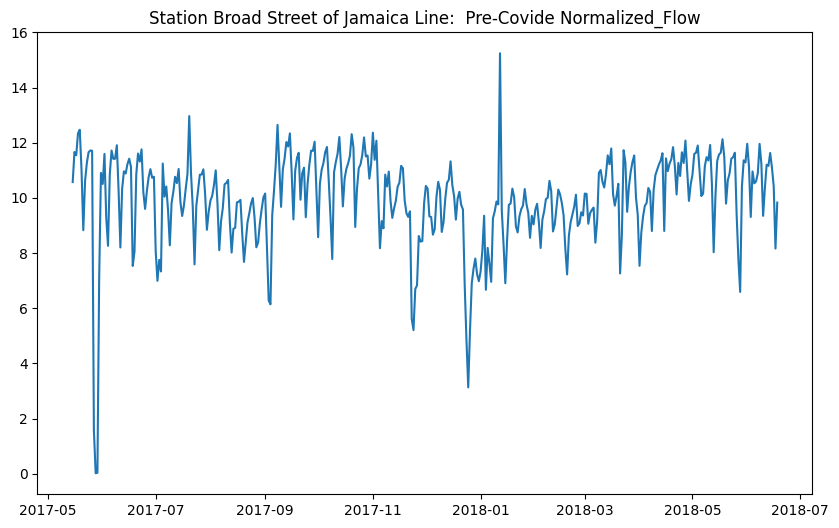

the length of the time-series data is 400


<Figure size 1600x1200 with 0 Axes>

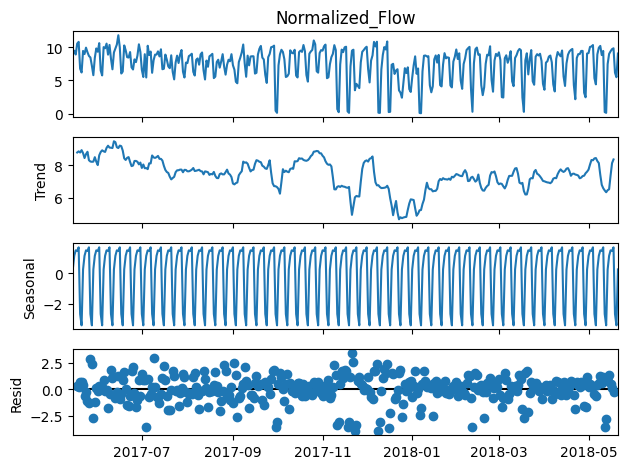

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  372
Model:             SARIMAX(5, 1, 1)x(2, 0, 1, 7)   Log Likelihood                -622.971
Date:                           Mon, 18 Dec 2023   AIC                           1267.943
Time:                                   06:53:13   BIC                           1311.021
Sample:                               05-15-2017   HQIC                          1285.052
                                    - 05-21-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.021e-05      0.000     -0.084      0.933      -0.000       0.000
ar.L1          0.5018      0.049     10.276

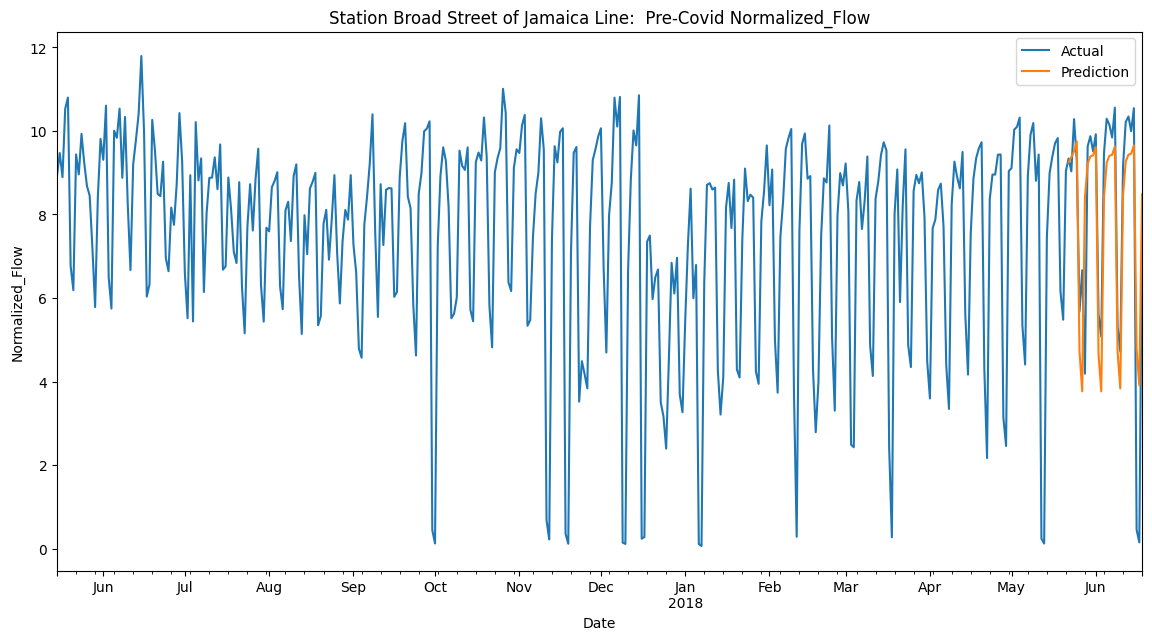

In [ ]:
# SARIMA for d2_pre_ridership (pre-Covid)

# d2 pre-covid
d2_pre_ridership = d2_time_flow_daily.iloc[100:100+400]


plt.figure(figsize=(10, 6))

plt.plot(d1_pre_ridership, linestyle='-')
plt.title('Station Broad Street of Jamaica Line:  Pre-Covid Normalized_Flow')
# Show the plot
plt.show()
d2_pre_ridership.head()



#pip install pmdarima

from pmdarima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting


y = d2_pre_ridership
print('the length of the time-series data is', len(y))


pd_steps = 28  # predicting 28 days ahead

y_train = y[:len(y) - pd_steps]
y_test = y[len(y) - pd_steps:]

# Decompose y_train
ts_decomp = sm.tsa.seasonal_decompose(y_train, model = 'additive')
plt.figure(figsize=(16, 12))
ts_decomp.plot()
plt.show()


# Use auto_arima to find the best ARIMA parameters with seasonalty set to 7 from the above decomposition

model = auto_arima(y_train, seasonal=True, m=7)  # Adjust 'm' based on your seasonality

# Print the summary of the best model
print(model.summary())

# Forecast
forecast, conf_int = model.predict(n_periods=pd_steps, return_conf_int=True)
predictions = pd.Series(forecast, index=y_test.index)

fig, ax = plt.subplots(figsize=(14, 7))
y.plot(label='Actual', ax=ax)
predictions.plot(ax=ax, label='Prediction')
plt.xlabel('Date')
plt.ylabel('Normalized_Flow')
plt.title('Station Broad Street of Jamaica Line:  Pre-Covid Normalized_Flow')
plt.legend()
plt.show()

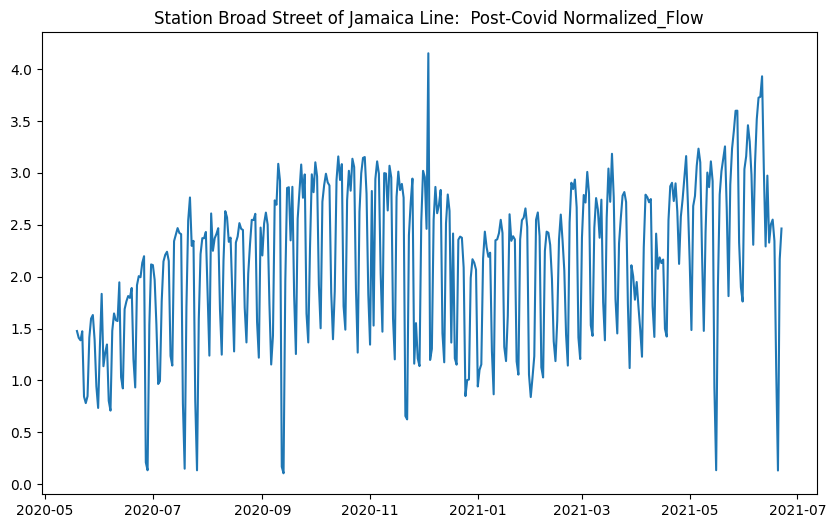

the lenth of the time-series data is 400


<Figure size 1600x1200 with 0 Axes>

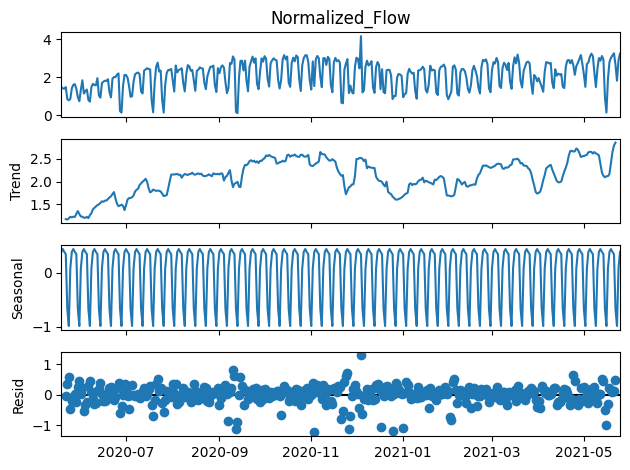

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  372
Model:             SARIMAX(5, 1, 0)x(2, 0, [1], 7)   Log Likelihood                -165.204
Date:                             Mon, 18 Dec 2023   AIC                            350.408
Time:                                     06:50:09   BIC                            389.570
Sample:                                 05-19-2020   HQIC                           365.962
                                      - 05-25-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.506e-05      0.001      0.100      0.921      -0.001       0.002
ar.L1         -0.4520      

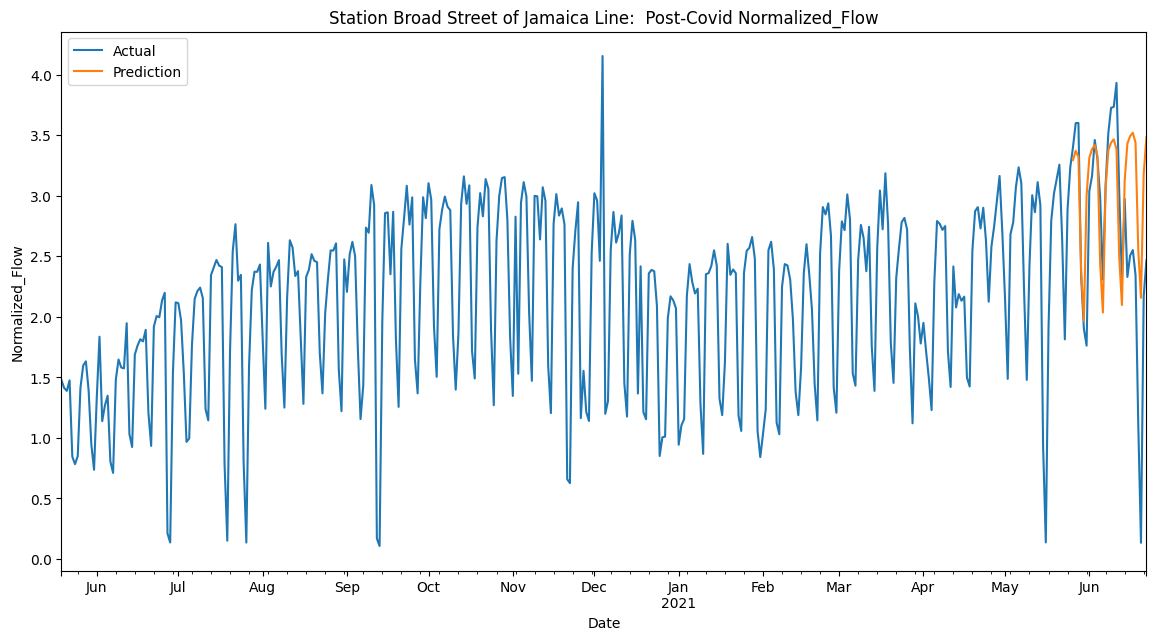

In [ ]:
# SARIMA (Seasonal ARIMA) for d2_post_ridership   (Post-Covid)

# d2 post-covid
d2_post_ridership = d2_time_flow_daily.iloc[1200:1200+400]


plt.figure(figsize=(10, 6))

plt.plot(d2_post_ridership, linestyle='-')
plt.title('Station Broad Street of Jamaica Line:  Post-Covid Normalized_Flow')
# Show the plot
plt.show()
d2_post_ridership.head()



#pip install pmdarima

from pmdarima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting


y = d2_post_ridership
print('the lenth of the time-series data is', len(y))


pd_steps = 28  # predicting 28 days ahead

y_train = y[:len(y) - pd_steps]
y_test = y[len(y) - pd_steps:]

# Decompose y_train
ts_decomp = sm.tsa.seasonal_decompose(y_train, model = 'additive')
plt.figure(figsize=(16, 12))
ts_decomp.plot()
plt.show()


# Use auto_arima to find the best ARIMA parameters with seasonalty set to 7 from the above decomposition

model = auto_arima(y_train, seasonal=True, m=7)  # Adjust 'm' based on your seasonality

# Print the summary of the best model
print(model.summary())

# Forecast
forecast, conf_int = model.predict(n_periods=pd_steps, return_conf_int=True)
predictions = pd.Series(forecast, index=y_test.index)

fig, ax = plt.subplots(figsize=(14, 7))
y.plot(label='Actual', ax=ax)
predictions.plot(ax=ax, label='Prediction')
plt.xlabel('Date')
plt.ylabel('Normalized_Flow')
plt.title('Station Broad Street of Jamaica Line:  Post-Covid Normalized_Flow')
plt.legend()
plt.show()

And so we applied seasonal ARIMA models to the four time series we have, First Avenue before and after Covid, and Broad Street before and after COVID. In both cases, we used the final 28 days as testing data and 1 year data before that as training data. And the four fitted ARIMA models produced different results, whether it be the number of autoregressive terms, moving average terms, or integrated terms. This shows that ARIMA models vary for individual stations before and after COVID, and also differ among different stations in the same time period.

Even though the ARIMA models with seaonality predict the ridership data into the next 28 days with good accuracy, there are still ways to improve the prediction.  For example, if we could include information such as if a day is a holiday, and the daily weather related information, we shall expect better results.

# Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(activation = "tanh",solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(180,50), random_state=1)

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

rmse = np.sqrt(np.sum((y_pred - y_test) ** 2) / len(X_test))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# notice
R_squared_Error = 1 - mse / np.var(y_test)
print("RMSE is:", rmse)
print("MSE is:", mse)
print("MAE is:", mae)
print("R2 score is:", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

random_regression = RandomForestRegressor(n_estimators = 300, random_state = 0, max_features="log2", max_depth= 30)
random_regression.fit(X_train, y_train)
y_pred = random_regression.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score is:", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVR

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, Yytrain)
linear_svr_y_predict = linear_svr.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, linear_svr_y_predict))
print('Mean Squared Error:', mean_squared_error(y_test, linear_svr_y_predict))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, linear_svr_y_predict)))
print("R2 score is:", r2_score(y_test, linear_svr_y_predict))

plt.scatter(y_test, linear_svr_y_predict)
plt.plot(y_test, y_test, color='red')
plt.show()